# Lab | Imbalanced data

We will be using the `files_for_lab/customer_churn.csv` dataset to build a churn predictor.

## Import Libraries

In [1]:
#import numpy and panda libraries
import numpy as np 
import pandas as pd 
import time
from datetime import date
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
#import the model from sklearn
from sklearn import linear_model #algorithms and AI
#import evaluation metrics from sklearn
from sklearn.metrics import mean_squared_error, r2_score
#import TTsplit from sklearn
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression #model
from sklearn.model_selection import train_test_split # tt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # eval
from sklearn.metrics import classification_report #eval
from sklearn.metrics import accuracy_score #eval
import sklearn.metrics as metrics

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [5]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

## Load the dataset and explore the variables.

In [6]:
#read the files
df=pd.read_csv('customer_churn.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape

(7043, 21)

In [9]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [12]:
# quick check NaN's
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [13]:
df["PaymentMethod"].nunique()

4

In [14]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [15]:
df["Contract"].nunique()

3

In [16]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [17]:
df["MultipleLines"].nunique()

3

In [18]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [19]:
df["InternetService"].nunique()

3

In [20]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

### Standardize header names 

In [21]:
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [22]:
def standardize_col(col):
    return col.lower().replace(" ","_")

In [23]:
standardize_col("customerID")

'customerid'

In [24]:
new_cols=[]
for col in df.columns:
    new_cols.append(standardize_col(col))
new_cols

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [25]:
df.columns=new_cols
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Data Cleaning - 1

In [26]:
# change total charges data type from object to float
df['totalcharges'] = pd.to_numeric(df['totalcharges'],errors='coerce')
df['totalcharges'] = df['totalcharges'].astype("float")

In [27]:
# check NaN's
df.isna().any()

customerid          False
gender              False
seniorcitizen       False
partner             False
dependents          False
tenure              False
phoneservice        False
multiplelines       False
internetservice     False
onlinesecurity      False
onlinebackup        False
deviceprotection    False
techsupport         False
streamingtv         False
streamingmovies     False
contract            False
paperlessbilling    False
paymentmethod       False
monthlycharges      False
totalcharges         True
churn               False
dtype: bool

In [28]:
# if there is any NaN, fill it with the average
na_cols = df.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in df.columns[1:]:
     if col in na_cols:
        if df[col].dtype != 'object':
             df[col] =  df[col].fillna(df[col].mean()).round(0)

## We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`, `MonthlyCharges`.
Churn: tasa de cancelación de clientes que dejan de utilizar el servicio

In [29]:
# create a var for categorical data and another for numerical data
cat = df.select_dtypes(include = np.object)
num = df.select_dtypes(include=np.number)

In [30]:
cat.head()

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [31]:
num.head()

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,30.0
1,0,34,56.95,1890.0
2,0,2,53.85,108.0
3,0,45,42.30,1841.0
4,0,2,70.70,152.0


In [32]:
# show the no of churns 
# there are more active customers than churns
df["churn"].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

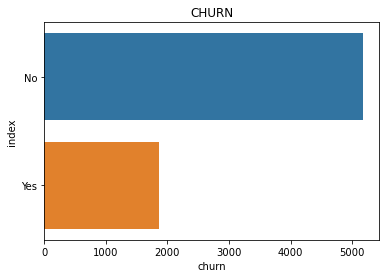

<Figure size 432x288 with 0 Axes>

In [33]:
# visualize no of churns in a barplot
churns_barplot = ['churn']
for col in churns_barplot:
    noofchurns = df[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = noofchurns).set_title(col.upper())
    plt.figure()


In [34]:
churn_bool = pd.DataFrame(df['churn'])
churn_bool

,churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [35]:
churn_bool = pd.get_dummies(churn_bool, columns =['churn']) #don't drop here the first column because if not, we can not extract the target var later
churn_bool

,churn_No,churn_Yes
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7038,1,0
7039,1,0
7040,1,0
7041,0,1


## Extract the target variable.

Dependent var : y - churn
Independent var : x - num 

In [36]:
churn_bool['churn_No'].value_counts()

1    5174
0    1869
Name: churn_No, dtype: int64

In [37]:
y = churn_bool['churn_No']
y

0       1
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    1
Name: churn_No, Length: 7043, dtype: uint8

In [38]:
churn_bool = churn_bool.drop(['churn_No'], axis=1)
churn_bool

,churn_Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [39]:
X = num
X

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,30.0
1,0,34,56.95,1890.0
2,0,2,53.85,108.0
3,0,45,42.30,1841.0
4,0,2,70.70,152.0
...,...,...,...,...
7038,0,24,84.80,1990.0
7039,0,72,103.20,7363.0
7040,0,11,29.60,346.0
7041,1,4,74.40,307.0


## Extract the independent variables and scale them.

In [40]:
# MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX1 = scaler.fit_transform(X)
rescaledX1

array([[0.        , 0.01388889, 0.11542289, 0.00126933],
       [0.        , 0.47222222, 0.38507463, 0.21590122],
       [0.        , 0.02777778, 0.35422886, 0.01027002],
       ...,
       [0.        , 0.15277778, 0.11293532, 0.03773367],
       [1.        , 0.05555556, 0.55870647, 0.03323333],
       [0.        , 0.91666667, 0.86965174, 0.78756058]])

In [41]:
# StandardScaler
scaler = StandardScaler().fit(X)
rescaledX2 = scaler.transform(X)
rescaledX2

array([[-0.43991649, -1.27744458, -1.16032292, -0.99490314],
       [-0.43991649,  0.06632742, -0.25962894, -0.17365226],
       [-0.43991649, -1.23672422, -0.36266036, -0.96046358],
       ...,
       [-0.43991649, -0.87024095, -1.1686319 , -0.85537879],
       [ 2.27315869, -1.15528349,  0.32033821, -0.87259857],
       [-0.43991649,  1.36937906,  1.35896134,  2.01370088]])

In [42]:
# Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
normalizedX

array([[0.        , 0.02362263, 0.70513554, 0.70867894],
       [0.        , 0.01797835, 0.03011374, 0.99938478],
       [0.        , 0.01657039, 0.44615769, 0.89480095],
       ...,
       [0.        , 0.03166033, 0.08519506, 0.99586115],
       [0.00316542, 0.01266169, 0.23550748, 0.9717849 ],
       [0.        , 0.00964189, 0.01543432, 0.99983439]])

## Build the logistic regression model.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                     test_size=0.4, 
                                                    random_state=40)

In [44]:
classification = LogisticRegression(random_state=0, 
                                    solver='lbfgs',
                                    max_iter = 400, 
                                    multi_class='ovr').fit(X_train,y_train)

In [45]:
predictions = classification.predict(X_test)
predictions

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [46]:
df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [47]:
# define the model 
lr=LogisticRegression(max_iter=400)

In [48]:
#seed 
X_train, X_test, y_train, y_test=train_test_split(X,y, 
                                                  test_size=0.3, 
                                                  random_state=40)

In [49]:
#fit the model to our training data set 
lr.fit(X_train,y_train)

LogisticRegression(max_iter=400)

## Evaluate the model 1

In [50]:
predictions=lr.predict(X_test)
# for our test data make some pred of y (using the trained model)

In [51]:
accuracy_score(y_test,predictions)
# comparing each actual y to each pred y for the test data set

0.7818267865593942

In [52]:
# we were right 74% of the time in classifying our status 
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix

array([[ 255,  305],
       [ 156, 1397]], dtype=int64)

<AxesSubplot:>

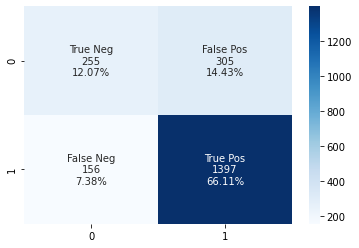

In [53]:
# predictions
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

**Correctly predicted:**
- **255 true-negative (12.07%)**: zeros predicted correctly
- **1397 true-positive (66.11%)**: ones predicted correctly

**Wrongly predicted:**
- **156 false-negative (7.38%)**: ones wrongly predicted as zeros
- **305 false-positive (14.43%)**: zeros wrongly predicted as ones

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7818267865593942


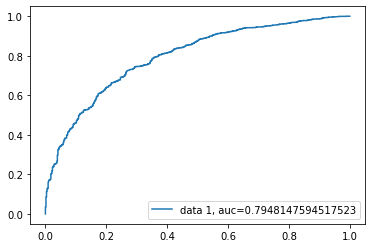

In [55]:
#AUC - area under the curve 
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Even a simple model will give us more than 70% accuracy. Why?

- Data is imbalanced: the difference between noofchurns values was big. 
- Despite a 78% is a good accuracy, we view this is because data is imbalanced.
- Next we should balance more the data in order to achieve a more reliable result. 

## Synthetic Minority Oversampling Technique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [56]:
smote = SMOTE()

In [57]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    5174
0    5174
Name: churn_No, dtype: int64

In [58]:
# train test split It2
Xsm_train, Xsm_test, ysm_train, ysm_test =train_test_split(X_sm, y_sm, test_size= 0.4, random_state=40)

In [59]:
# apply model It2 
classification = LogisticRegression(random_state=0, 
                                    solver='lbfgs',
                                    max_iter=400,
                                    multi_class='ovr').fit(Xsm_train, ysm_train)

In [60]:
#accuracy assessment It2
predictions = classification.predict(Xsm_test)
accuracy_score(ysm_test, predictions)

0.7289855072463768

In [61]:
cnf_matrix = confusion_matrix(ysm_test, predictions)
cnf_matrix

array([[1656,  444],
       [ 678, 1362]], dtype=int64)

<AxesSubplot:>

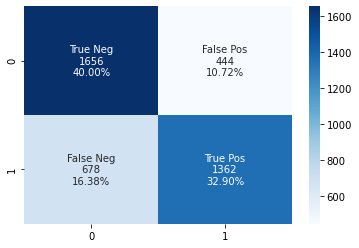

In [62]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

**Correctly predicted:**
- **1671 true-negative (40.36%)**: zeros predicted correctly
- **1373 true-positive (33.16%)**: ones predicted correctly

**Wrongly predicted:**
- **667 false-negative (16.11%)**: ones wrongly predicted as zeros
- **429 false-positive (10.36%)**: zeros wrongly predicted as ones

In [63]:
print("Accuracy:",metrics.accuracy_score(ysm_test, predictions))

Accuracy: 0.7289855072463768


### Smote observations
- We have gain in the confusion matrix, but lost in the accuracy percentage 

## Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [64]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

1    4616
0    1869
Name: churn_No, dtype: int64

In [65]:
#train test split It3
Xtl_train, Xtl_test, ytl_train, ytl_test =train_test_split(X_tl, y_tl, 
                                                           test_size= 0.4, 
                                                           random_state=40)

In [66]:
# apply model It3
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(Xtl_train, ytl_train)

In [67]:
#accuracy It3
predictions = classification.predict(Xtl_test)
accuracy_score(ytl_test, predictions)

0.7810331534309946

In [68]:
cnf_matrix = confusion_matrix(ytl_test, predictions)
cnf_matrix

array([[ 405,  359],
       [ 209, 1621]], dtype=int64)

<AxesSubplot:>

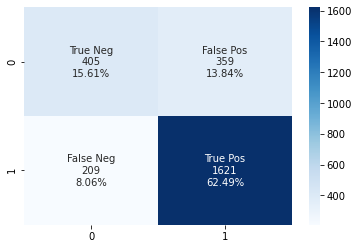

In [69]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

### Tomek observations
- Tomek has a greater accuracy but worse balance 